#Online sales business by product type


Diberikan sebuah data hasil penjualan berdasarkan tipe produk. Net Quantity menyatakan banyaknya barang yang terjual, jika nilainya negatif artinya terdapat barang yang rusak dan mendapatkan kerugian seharga dengan harga jual barang. Gross Sales menyatakan total harga jual yang diperoleh dari harga satuan barang dikali dengan Net Quantity pada jenis barang tertentu. Discounts menyatakan total potongan harga dari suatu jenis barang. Returns menyatakan pengembalian dana yang dilakukan penjual kepada pembeli dikarenakan beberapa alasan pengembalian barang. Total Net Sales merupakan total harga jual akhir, atau total pendapatan dari suatu jenis barang.

#Defining Questions

1. What would be the trend of Revenue vs Nett Sales month over month and year over year? on which month we have the highest or lowest sales? why? (Data by Month)
2. What's the growth rate of sales? (Data by Month)
3. What product line contributes the most to the sales?
4. The discounted items - has it been effective to the sales increase?
5. Which product has the highest return? what can we do to improve? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_excel('/content/Case study A - online sales business (2).xlsx')
print("Shape dataset : ", df.shape)
print('\nLima data teratas')
df.head()
print('\nInformasi dataset')
df.info()
print('\nStatistik deskriptif')
df.describe()

Shape dataset :  (1775, 6)

Lima data teratas

Informasi dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB

Statistik deskriptif


,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [161]:
#Missing Value
df.isnull().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [162]:
#Menghapus missing value
df.dropna(inplace = True)
print('\nLima data teratas')
df.head()
print('\nInformasi dataset')
df.info()
print('\nStatistik deskriptif')
df.describe()


Lima data teratas

Informasi dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1767 non-null   int64  
 2   Gross Sales      1767 non-null   float64
 3   Discounts        1767 non-null   float64
 4   Returns          1767 non-null   float64
 5   Total Net Sales  1767 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 96.6+ KB

Statistik deskriptif


,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,3.724958,200.258546,-6.346225,-5.409819,188.502501
std,6.254526,465.839377,20.946475,46.758411,415.396470
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.160000,0.000000,44.900000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,187.000000,0.000000,0.000000,185.000000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [163]:
#Membuat dataframe berdasarkan Product Type
Kolom = df.columns.tolist()
Kolom = Kolom[1:]
df_sum = pd.DataFrame(df.groupby(["Product Type"])[Kolom].sum())
df_sum

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
Product Type,,,,,
Accessories,84,3892.40,-107.02,0.00,3785.38
Art & Sculpture,1427,90316.60,-2955.82,-2879.93,84480.85
Basket,1461,143815.50,-4584.42,-4439.69,134791.39
Christmas,575,15476.00,-345.19,-670.00,14460.81
Easter,1,38.00,-3.80,0.00,34.20
Fair Trade Gifts,110,2258.00,-53.33,0.00,2204.67
Furniture,27,2034.00,-169.04,0.00,1864.96
Gift Baskets,1,19.50,0.00,0.00,19.50
Home Decor,404,27114.55,-991.21,-423.35,25699.99


In [164]:
#Barang rusak
df[df["Net Quantity"]<0]

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
1774,Kitchen,-1,0.0,0.0,-106.25,-106.25


Dari seluruh penjualan, terdapat 1 produk yang mengalami kerusakan seharga $106.25, dengan tipe produk Kitchen. Sehingga menagalami kerugian sebesar harga produk.

In [165]:
#Banyaknya jenis barang pada setiap tipe produk
PT_VC = df["Product Type"].value_counts()
PT_VCd = PT_VC.to_dict()
print('Number of Types')
PT_VCd

Number of Types


{'Accessories': 39,
 'Art & Sculpture': 337,
 'Basket': 551,
 'Christmas': 73,
 'Easter': 1,
 'Fair Trade Gifts': 28,
 'Furniture': 16,
 'Gift Baskets': 1,
 'Home Decor': 131,
 'Jewelry': 210,
 'Kids': 63,
 'Kitchen': 161,
 'Music': 29,
 'One-of-a-Kind': 12,
 'Recycled Art': 23,
 'Skin Care': 11,
 'Soapstone': 67,
 'Textiles': 14}

In [166]:
Index_P = df_sum.index
print("Index dataset")
Index_P

Index dataset


Index(['Accessories', 'Art & Sculpture', 'Basket', 'Christmas', 'Easter',
       'Fair Trade Gifts', 'Furniture', 'Gift Baskets', 'Home Decor',
       'Jewelry', 'Kids', 'Kitchen', 'Music', 'One-of-a-Kind', 'Recycled Art',
       'Skin Care', 'Soapstone', 'Textiles'],
      dtype='object', name='Product Type')

In [167]:
#Membuat kolom Number of Types
PT_VCd1 = []
for i in Index_P:
  PT_VCd1.append(PT_VCd[i])
list1 = pd.DataFrame(PT_VCd1, columns=["Number of Types"], index=[Index_P])
list1

,Number of Types
Product Type,
Accessories,39
Art & Sculpture,337
Basket,551
Christmas,73
Easter,1
Fair Trade Gifts,28
Furniture,16
Gift Baskets,1
Home Decor,131


In [168]:
df_sum["Number of Types"]= PT_VCd1
cols = df_sum.columns.tolist()
cols = cols[-1:] + cols[1:-1] 
df_sum = df_sum[cols]
df_sum

,Number of Types,Gross Sales,Discounts,Returns,Total Net Sales
Product Type,,,,,
Accessories,39,3892.40,-107.02,0.00,3785.38
Art & Sculpture,337,90316.60,-2955.82,-2879.93,84480.85
Basket,551,143815.50,-4584.42,-4439.69,134791.39
Christmas,73,15476.00,-345.19,-670.00,14460.81
Easter,1,38.00,-3.80,0.00,34.20
Fair Trade Gifts,28,2258.00,-53.33,0.00,2204.67
Furniture,16,2034.00,-169.04,0.00,1864.96
Gift Baskets,1,19.50,0.00,0.00,19.50
Home Decor,131,27114.55,-991.21,-423.35,25699.99


In [169]:
#Percentage of Total Net Sales
PP = []
for i in range(len(PT_VCd1)):
    pr = (df_sum["Total Net Sales"][i] / (df_sum["Total Net Sales"].sum())) * 100
    PP.append(round(pr,2))
df_sum["Percentage of Total Net Sales (%)"] = PP
df_sum

,Number of Types,Gross Sales,Discounts,Returns,Total Net Sales,Percentage of Total Net Sales (%)
Product Type,,,,,,
Accessories,39,3892.40,-107.02,0.00,3785.38,1.14
Art & Sculpture,337,90316.60,-2955.82,-2879.93,84480.85,25.36
Basket,551,143815.50,-4584.42,-4439.69,134791.39,40.47
Christmas,73,15476.00,-345.19,-670.00,14460.81,4.34
Easter,1,38.00,-3.80,0.00,34.20,0.01
Fair Trade Gifts,28,2258.00,-53.33,0.00,2204.67,0.66
Furniture,16,2034.00,-169.04,0.00,1864.96,0.56
Gift Baskets,1,19.50,0.00,0.00,19.50,0.01
Home Decor,131,27114.55,-991.21,-423.35,25699.99,7.72


In [171]:
#Mengurutkan data berdasarkan Total Net Sales terbesar
df_sum = df_sum.sort_values(by=["Total Net Sales"], ascending=False)
df_sum

,Number of Types,Gross Sales,Discounts,Returns,Total Net Sales,Percentage of Total Net Sales (%)
Product Type,,,,,,
Basket,551,143815.50,-4584.42,-4439.69,134791.39,40.47
Art & Sculpture,337,90316.60,-2955.82,-2879.93,84480.85,25.36
Jewelry,210,31048.00,-965.85,-509.20,29572.95,8.88
Home Decor,131,27114.55,-991.21,-423.35,25699.99,7.72
Kitchen,161,16096.00,-431.11,-328.07,15336.82,4.60
Christmas,73,15476.00,-345.19,-670.00,14460.81,4.34
Soapstone,67,4795.50,-96.91,-69.50,4629.09,1.39
Accessories,39,3892.40,-107.02,0.00,3785.38,1.14
Kids,63,3838.00,-116.66,0.00,3721.34,1.12


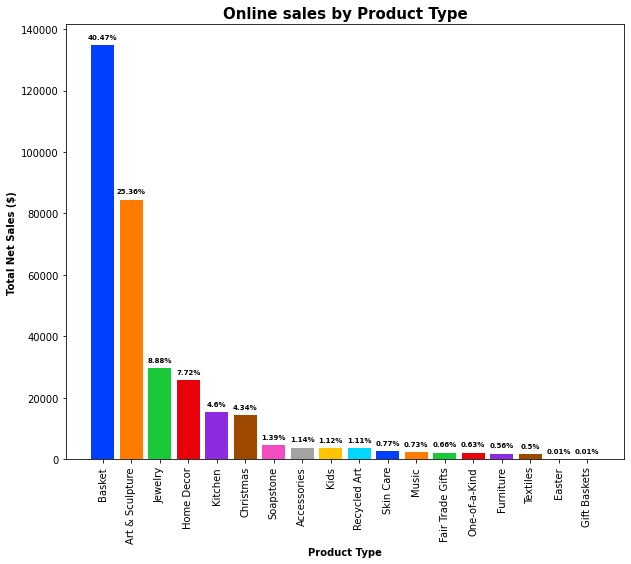

In [174]:
#Visualisasi Product Type terhadap Total Net Sales
PP1 = np.array(df_sum["Percentage of Total Net Sales (%)"])
plt.figure(figsize=(10,8))
colour1 = sns.color_palette("bright")[0:18]
graph = plt.bar(df_sum.index, df_sum["Total Net Sales"], color=colour1)
plt.title("Online sales by Product Type", weight="bold", fontsize=15)
plt.ylabel("Total Net Sales ($)", fontsize=10, weight="bold")
plt.xlabel("Product Type", fontsize=10, weight="bold")
plt.xticks(rotation=90)


#Membuat text persentase pada chart
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height+2000,
             str(PP1[i])+"%",
             ha="center", fontsize=7, 
             weight="bold")
    i += 1
plt.show()

Berdasarkan dataset, produk yang paling berpengaruh pada penjualan adalah produk basket, dengan 551 jenis tipe yang terjual dan total pemasukan sebesar $134791.39. 

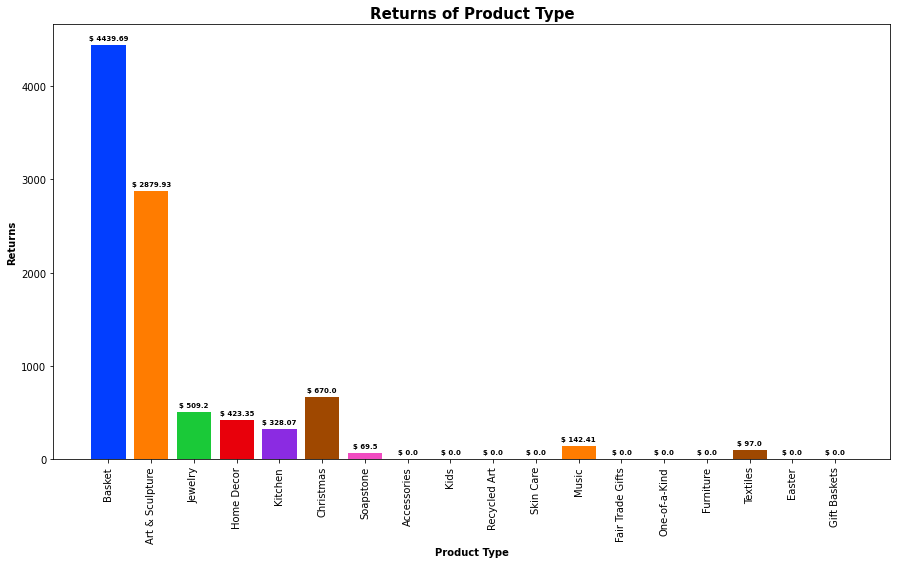

In [175]:
#Visualisasi Product Type terhadap Returns
plt.figure(figsize=(15,8))
colour1 = sns.color_palette("bright")[0:18]
graph = plt.bar(df_sum.index, PPR1, color=colour1)
plt.title("Returns of Product Type", weight="bold", fontsize=15)
plt.ylabel("Returns", fontsize=10, weight="bold")
plt.xlabel("Product Type", fontsize=10, weight="bold")
plt.xticks(rotation=90)

#Persentase Returns
PPR = np.array(df_sum["Returns"])
PPR1 = []
for i in range(len(PT_VCd1)):
  PPR1.append(round((PPR[i]-2*PPR[i]), 2))

#Membuat text pada chart
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height+50,
             "$ "+str(PPR1[i]),
             ha="center", fontsize=7, 
             weight="bold")
    i += 1
plt.show()

Produk dengan return terbanyak ada pada produk yang memiliki pemasukan tertinggi yaitu produk basket, yaitu dengan return sebesar $4439.69. Untuk meminimalisir return yang besar, kita dapat mengevaluasi produk basket. Ternyata dengan besarnya penjualan produk basket ini, membuat returnnya juga besar. jika return pada produk ini bisa diminimalisir sebaik mungkin, perusahaan dapat menghasilkan keuntungan yang lebih banyak.

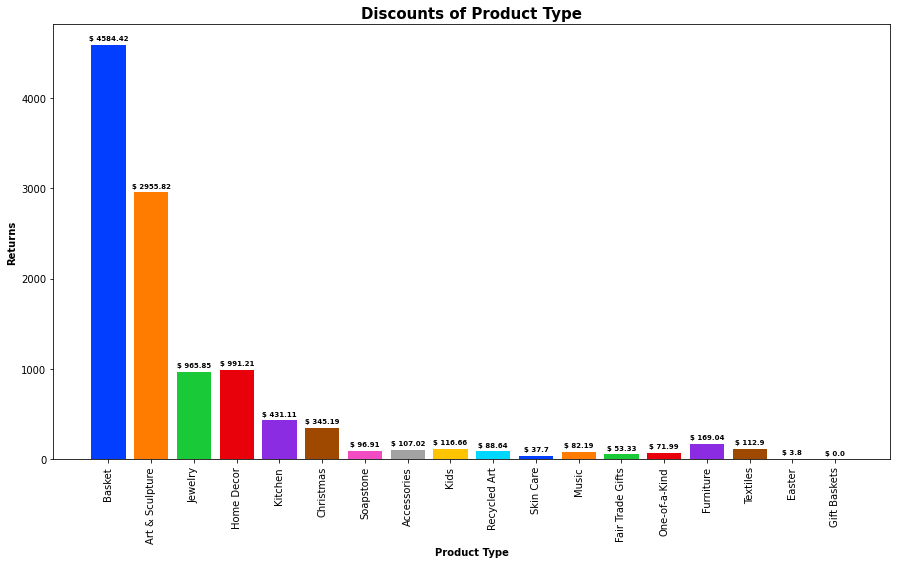

In [176]:
#Visualisasi Product Type terhadap Discounts
plt.figure(figsize=(15,8))
colour1 = sns.color_palette("bright")[0:18]
graph = plt.bar(df_sum.index, PPD1, color=colour1)
plt.title("Discounts of Product Type", weight="bold", fontsize=15)
plt.ylabel("Discounts", fontsize=10, weight="bold")
plt.xlabel("Product Type", fontsize=10, weight="bold")
plt.xticks(rotation=90)

#Persentase Discounts
PPD = np.array(df_sum["Discounts"])
PPD1 = []
for i in range(len(PT_VCd1)):
  PPD1.append(round((PPD[i]-2*PPD[i]), 2))

#Membuat text pada chart
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height+50,
             "$ "+str(PPD1[i]),
             ha="center", fontsize=7, 
             weight="bold")
    i += 1
plt.show()